# Ejemplo de Interfaces en MVC: Gestión de Datos de una Persona

## Introducción

En este ejemplo, utilizaremos el patrón MVC (Modelo-Vista-Controlador) junto con una interfaz `IActualizable` para gestionar los datos de una persona (Nombre, Apellido, Teléfono).

## Interfaz `IActualizable`

Definimos una interfaz que declara el método `ActualizarDatos`:

```csharp
public interface IActualizable
{
    void ActualizarDatos(string nombre, string apellido, string telefono);
}

## Modelo `Persona` 
El modelo `Persona` implementa la interfaz y gestiona los datos de la persona
```csharp
public class ModeloPersona : IActualizable
{
    public string Nombre { get; private set; }
    public string Apellido { get; private set; }
    public string Telefono { get; private set; }

    public void ActualizarDatos(string nombre, string apellido, string telefono) // llama el método conectado por la interface
    {
        Nombre = nombre;
        Apellido = apellido;
        Telefono = telefono;
    }
}

## Vista `VistaPersona` 
La vista `VistaPersona` implementa la interfaz y muestra los datos actualizados en la consola.
```csharp
public class VistaPersona : IActualizable
{
    public void ActualizarDatos(string nombre, string apellido, string telefono) // LLama el metodo conectado por la interface
    {
        Console.WriteLine($"Nombre: {nombre}");
        Console.WriteLine($"Apellido: {apellido}");
        Console.WriteLine($"Teléfono: {telefono}");
    }
}

## Controlador `ControladorPersona` 
El controlador conecta el modelo y la vista, y asegura que los cambios en el modelo se reflejen en la vista
```csharp
public class ControladorPersona
{
    private ModeloPersona instaModelo;
    private VistaPersona instaVista;

    public ControladorPersona(Persona modelo, VistaPersona vista)
    {
        instaModelo = modelo;
        instaVista = vista;
    }

    public void CambiarDatos(string nombre, string apellido, string telefono) 
    {
        instaModelo.ActualizarDatos(nombre, apellido, telefono);
        instaVista.ActualizarDatos(nombre, apellido, telefono);
    }
}

## Uso en el Programa Principal
```csharp
class Program
{
    static void Main(string[] args)
    {
        Persona modelo = new Persona();
        VistaPersona vista = new VistaPersona();
        ControladorPersona controlador = new ControladorPersona(modelo, vista);

        // Cambiar y actualizar los datos de la persona
        controlador.CambiarDatos("Juan", "Pérez", "123-456-7890");

        // Cambiar los datos nuevamente
        controlador.CambiarDatos("Ana", "Gómez", "098-765-4321");
    }
}

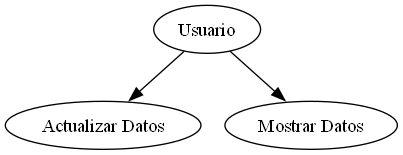

In [37]:
# DIAGRAMA DE CASO DE USO EJEMPLO

from graphviz import Digraph
from IPython.display import Image

dot = Digraph(comment='Diagrama de Caso de Uso')

# Actores
dot.node('Usuario', 'Usuario')

# Casos de Uso
dot.node('CU1', 'Actualizar Datos')
dot.node('CU2', 'Mostrar Datos')

# Relaciones
dot.edge('Usuario', 'CU1')
dot.edge('Usuario', 'CU2')

dot.render('caso_uso', format='png')
Image(filename='caso_uso.png')

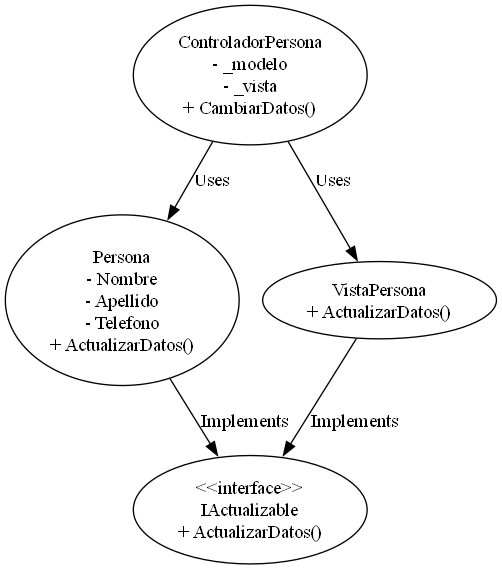

In [22]:
#DIAGRAMA DE ESPECIFICACIONES DE CASO DE USO
from graphviz import Digraph
from IPython.display import Image
dot = Digraph(comment='Diagrama de Clases')

# Clases
dot.node('IActualizable', '<<interface>>\nIActualizable\n+ ActualizarDatos()')
dot.node('Persona', 'Persona\n- Nombre\n- Apellido\n- Telefono\n+ ActualizarDatos()')
dot.node('VistaPersona', 'VistaPersona\n+ ActualizarDatos()')
dot.node('ControladorPersona', 'ControladorPersona\n- _modelo\n- _vista\n+ CambiarDatos()')

# Relaciones
dot.edge('Persona', 'IActualizable', 'Implements')
dot.edge('VistaPersona', 'IActualizable', 'Implements')
dot.edge('ControladorPersona', 'Persona', 'Uses')
dot.edge('ControladorPersona', 'VistaPersona', 'Uses')

dot.render('especificaciones', format='png')
Image(filename='especificaciones.png')

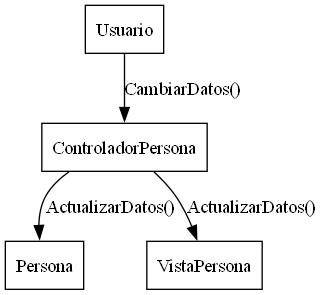

In [18]:
# DIAGRAMA DE SECUENCIA
from graphviz import Digraph
from IPython.display import Image
dot = Digraph(comment='Diagrama de Secuencia')

# Lifelines
dot.node('User', 'Usuario', shape='rect')
dot.node('Controller', 'ControladorPersona', shape='rect')
dot.node('Model', 'Persona', shape='rect')
dot.node('View', 'VistaPersona', shape='rect')

# Interacciones
dot.edge('User', 'Controller', 'CambiarDatos()')
dot.edge('Controller', 'Model', 'ActualizarDatos()')
dot.edge('Controller', 'View', 'ActualizarDatos()')

dot.render('secuencia', format='png')
Image(filename='secuencia.png')

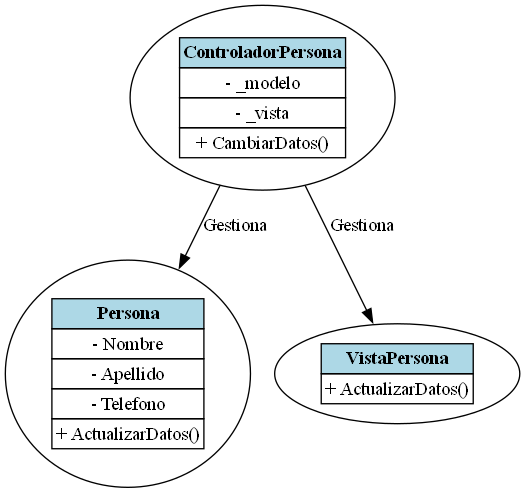

In [53]:
# ENTIDAD RELACIÓN
from graphviz import Digraph
from IPython.display import Image

dot = Digraph(comment='Diagrama Entidad-Relación en Estilo UML')

# Definición de las Entidades como cuadros UML
dot.node('Modelo', '''<
    <table border="0" cellborder="1" cellspacing="0">
        <tr><td bgcolor="lightblue"><b>Persona</b></td></tr>
        <tr><td>- Nombre</td></tr>
        <tr><td>- Apellido</td></tr>
        <tr><td>- Telefono</td></tr>
        <tr><td>+ ActualizarDatos()</td></tr>
    </table>
>''')

dot.node('Vista', '''<
    <table border="0" cellborder="1" cellspacing="0">
        <tr><td bgcolor="lightblue"><b>VistaPersona</b></td></tr>
        <tr><td>+ ActualizarDatos()</td></tr>
    </table>
>''')

dot.node('Controlador', '''<
    <table border="0" cellborder="1" cellspacing="0">
        <tr><td bgcolor="lightblue"><b>ControladorPersona</b></td></tr>
        <tr><td>- _modelo</td></tr>
        <tr><td>- _vista</td></tr>
        <tr><td>+ CambiarDatos()</td></tr>
    </table>
>''')

# Definición de las Relaciones entre Entidades
dot.edge('Controlador', 'Modelo', 'Gestiona')
dot.edge('Controlador', 'Vista', 'Gestiona')

# Renderización del Diagrama
dot.render('entidad_relacion_uml', format='png')
Image(filename='entidad_relacion_uml.png')

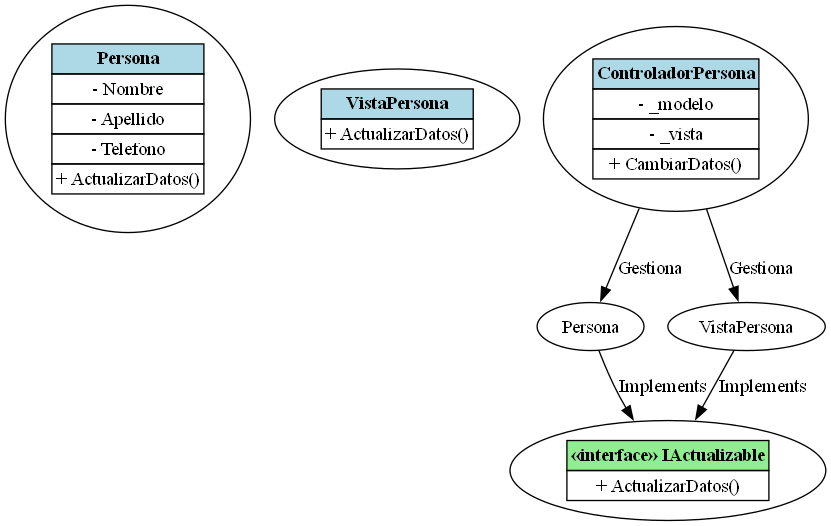

In [55]:
#ENTIDAD RELACIÓN CON INTERFAZ

from graphviz import Digraph
from IPython.display import Image

dot = Digraph(comment='Diagrama Entidad-Relación con Interfaz')

# Definición de las Entidades como cuadros UML
dot.node('Modelo', '''<
    <table border="0" cellborder="1" cellspacing="0">
        <tr><td bgcolor="lightblue"><b>Persona</b></td></tr>
        <tr><td>- Nombre</td></tr>
        <tr><td>- Apellido</td></tr>
        <tr><td>- Telefono</td></tr>
        <tr><td>+ ActualizarDatos()</td></tr>
    </table>
>''')

dot.node('Vista', '''<
    <table border="0" cellborder="1" cellspacing="0">
        <tr><td bgcolor="lightblue"><b>VistaPersona</b></td></tr>
        <tr><td>+ ActualizarDatos()</td></tr>
    </table>
>''')

dot.node('Controlador', '''<
    <table border="0" cellborder="1" cellspacing="0">
        <tr><td bgcolor="lightblue"><b>ControladorPersona</b></td></tr>
        <tr><td>- _modelo</td></tr>
        <tr><td>- _vista</td></tr>
        <tr><td>+ CambiarDatos()</td></tr>
    </table>
>''')

dot.node('IActualizable', '''<
    <table border="0" cellborder="1" cellspacing="0">
        <tr><td bgcolor="lightgreen"><b>«interface» IActualizable</b></td></tr>
        <tr><td>+ ActualizarDatos()</td></tr>
    </table>
>''')

# Definición de las Relaciones entre Entidades e Interfaz
dot.edge('Persona', 'IActualizable', 'Implements')
dot.edge('VistaPersona', 'IActualizable', 'Implements')
dot.edge('Controlador', 'Persona', 'Gestiona')
dot.edge('Controlador', 'VistaPersona', 'Gestiona')

# Renderización del Diagrama
dot.render('entidad_relacion_uml_con_interfaz', format='png')
dot = Digraph(comment='Diagrama Entidad-Relación con Interfaz')

# Definición de las Entidades como cuadros UML
dot.node('Modelo', '''<
    <table border="0" cellborder="1" cellspacing="0">
        <tr><td bgcolor="lightblue"><b>Persona</b></td></tr>
        <tr><td>- Nombre</td></tr>
        <tr><td>- Apellido</td></tr>
        <tr><td>- Telefono</td></tr>
        <tr><td>+ ActualizarDatos()</td></tr>
    </table>
>''')

dot.node('Vista', '''<
    <table border="0" cellborder="1" cellspacing="0">
        <tr><td bgcolor="lightblue"><b>VistaPersona</b></td></tr>
        <tr><td>+ ActualizarDatos()</td></tr>
    </table>
>''')

dot.node('Controlador', '''<
    <table border="0" cellborder="1" cellspacing="0">
        <tr><td bgcolor="lightblue"><b>ControladorPersona</b></td></tr>
        <tr><td>- _modelo</td></tr>
        <tr><td>- _vista</td></tr>
        <tr><td>+ CambiarDatos()</td></tr>
    </table>
>''')

dot.node('IActualizable', '''<
    <table border="0" cellborder="1" cellspacing="0">
        <tr><td bgcolor="lightgreen"><b>«interface» IActualizable</b></td></tr>
        <tr><td>+ ActualizarDatos()</td></tr>
    </table>
>''')

# Definición de las Relaciones entre Entidades e Interfaz
dot.edge('Persona', 'IActualizable', 'Implements')
dot.edge('VistaPersona', 'IActualizable', 'Implements')
dot.edge('Controlador', 'Persona', 'Gestiona')
dot.edge('Controlador', 'VistaPersona', 'Gestiona')

# Renderización del Diagrama
dot.render('entidad_relacion_uml_con_interfaz', format='png')
Image(filename='entidad_relacion_uml_con_interfaz.png')
